In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import yfinance as yf

In [31]:
# User input for stock ticker
ticker = input("Enter the stock ticker (e.g., AAPL for Apple): ").upper()

# Fetch 1 year of historical data
stock = yf.Ticker(ticker)
data = stock.history(period="1y")

# Check if data is valid
if data.empty:
    raise ValueError(f"No data found for {ticker}. Please check the ticker symbol.")

# Display basic info
print(f"Data fetched for {ticker} from {data.index[0].date()} to {data.index[-1].date()}")
data.head()

Enter the stock ticker (e.g., AAPL for Apple):  AAPL


Data fetched for AAPL from 2024-04-03 to 2025-04-02


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-03 00:00:00-04:00,167.996733,169.877850,167.787728,168.852692,47691700,0.0,0.0
2024-04-04 00:00:00-04:00,169.489704,171.112049,168.026627,168.026627,53704400,0.0,0.0
2024-04-05 00:00:00-04:00,168.792968,169.589211,168.155976,168.783020,42055200,0.0,0.0
2024-04-08 00:00:00-04:00,168.235616,168.404816,167.449336,167.658340,37425500,0.0,0.0
2024-04-09 00:00:00-04:00,167.907162,169.280681,167.558816,168.872604,42451200,0.0,0.0


In [32]:
# Select relevant columns and handle missing values
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
 

In [33]:
 
# Add a date column for clarity (index is already datetime)
data['Date'] = data.index

 

In [34]:
# Summary statistics
print("Summary Statistics:")
print(data.describe()) 

Summary Statistics:
             Open        High         Low       Close        Volume
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean   218.911307  221.237320  216.865867  219.200722  5.483991e+07
std     22.181794   22.319741   21.876708   22.235242  3.044067e+07
min    164.572913  165.617978  163.308889  164.224564  2.323470e+07
25%    212.894477  215.283116  210.281107  213.036430  3.982530e+07
50%    224.436039  226.331875  222.515348  224.256287  4.801330e+07
75%    232.697865  234.517946  229.477700  232.753716  6.031885e+07
max    257.906429  259.814335  257.347047  258.735504  3.186799e+08


In [35]:
data.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2024-04-03 00:00:00-04:00,167.996733,169.877850,167.787728,168.852692,47691700,2024-04-03 00:00:00-04:00
2024-04-04 00:00:00-04:00,169.489704,171.112049,168.026627,168.026627,53704400,2024-04-04 00:00:00-04:00
2024-04-05 00:00:00-04:00,168.792968,169.589211,168.155976,168.783020,42055200,2024-04-05 00:00:00-04:00
2024-04-08 00:00:00-04:00,168.235616,168.404816,167.449336,167.658340,37425500,2024-04-08 00:00:00-04:00
2024-04-09 00:00:00-04:00,167.907162,169.280681,167.558816,168.872604,42451200,2024-04-09 00:00:00-04:00


In [36]:
# Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20-day MA
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day MA
data['MA200'] = data['Close'].rolling(window=200).mean()  # 200-day MA

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

 

In [37]:
data['RSI'] = calculate_rsi(data)

# Bollinger Bands
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_Std'] = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + (data['BB_Std'] * 2)
data['BB_Lower'] = data['BB_Middle'] - (data['BB_Std'] * 2)

# Drop NaN values from indicators
data = data.dropna()

print("Technical indicators calculated:")
data[['Close', 'MA20', 'MA50', 'MA200', 'RSI', 'BB_Upper', 'BB_Middle', 'BB_Lower']].tail()

Technical indicators calculated:


,Close,MA20,MA50,MA200,RSI,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,
2025-03-27 00:00:00-04:00,223.850006,223.928500,230.685403,228.502838,35.614372,244.396214,223.928500,203.460786
2025-03-28 00:00:00-04:00,217.899994,222.731500,230.291228,228.629972,39.864582,241.519905,222.731500,203.943095
2025-03-31 00:00:00-04:00,222.130005,221.936501,230.173642,228.708341,51.438135,239.290081,221.936501,204.582920
2025-04-01 00:00:00-04:00,223.190002,221.299501,230.042893,228.762510,57.384069,237.378812,221.299501,205.220190
2025-04-02 00:00:00-04:00,223.889999,220.707001,230.072784,228.814348,70.042307,235.355489,220.707001,206.058512


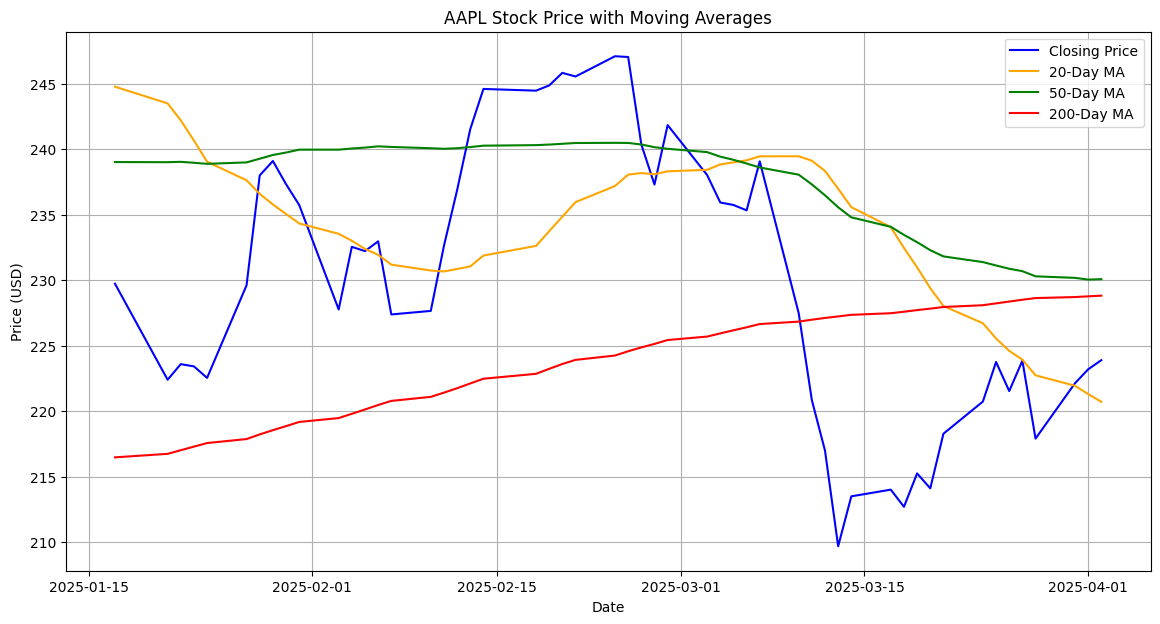

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['MA50'], label='50-Day MA', color='green')
plt.plot(data['MA200'], label='200-Day MA', color='red')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

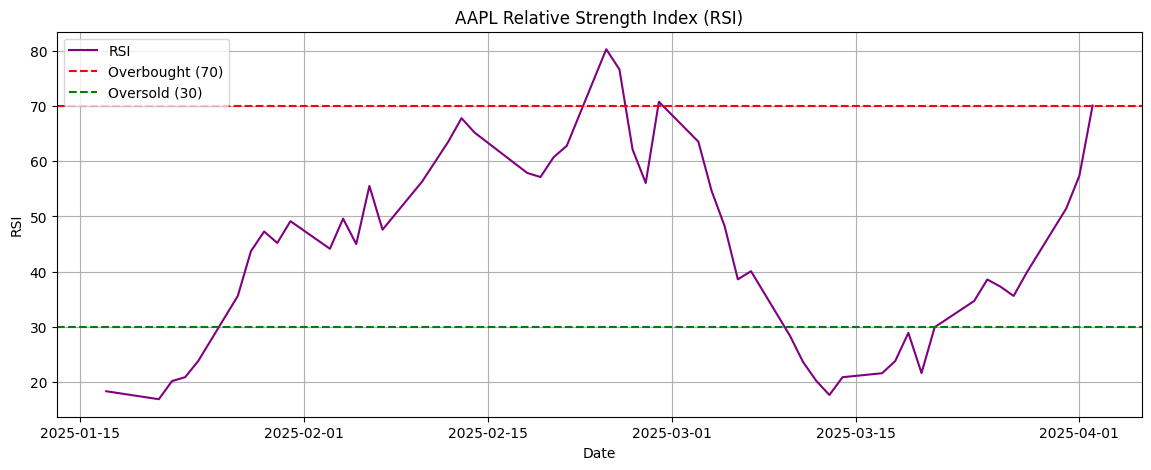

In [39]:
plt.figure(figsize=(14, 5))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f"{ticker} Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid()
plt.show()

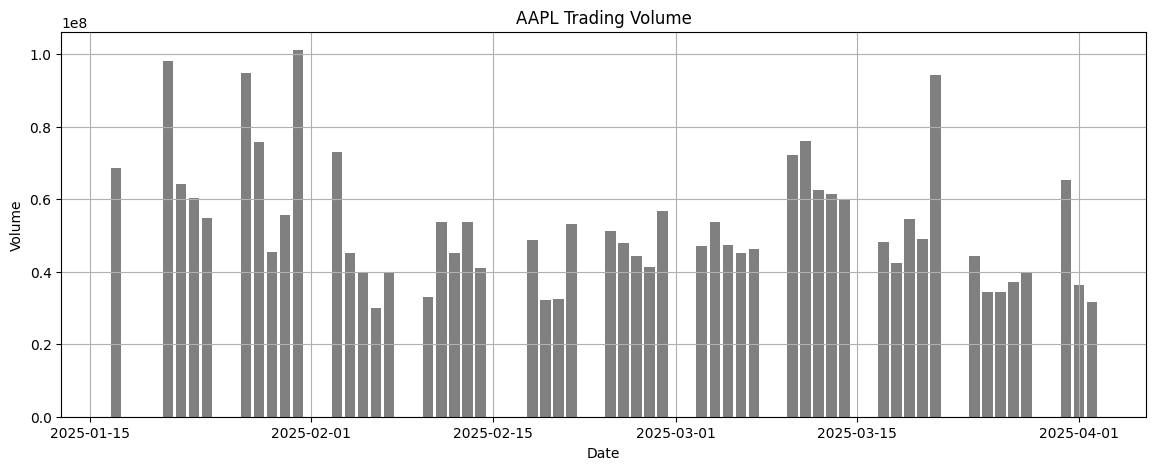

In [41]:
plt.figure(figsize=(14, 5))
plt.bar(data.index, data['Volume'], color='gray')
plt.title(f"{ticker} Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid()
plt.show()

In [44]:
from datetime import datetime


In [46]:
# Latest values
latest_close = data['Close'][-1]
latest_ma50 = data['MA50'][-1]
latest_ma200 = data['MA200'][-1]
latest_rsi = data['RSI'][-1]
latest_bb_upper = data['BB_Upper'][-1]
latest_bb_lower = data['BB_Lower'][-1]

 

/var/folders/jv/_gs50w5x6zq747kbpznwtf_c0000gn/T/ipykernel_37498/243444859.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_close = data['Close'][-1]
/var/folders/jv/_gs50w5x6zq747kbpznwtf_c0000gn/T/ipykernel_37498/243444859.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  latest_ma50 = data['MA50'][-1]
/var/folders/jv/_gs50w5x6zq747kbpznwtf_c0000gn/T/ipykernel_37498/243444859.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

In [47]:
# Decision rules
signals = []
if latest_ma50 > latest_ma200:
    signals.append("Bullish MA Crossover (Keep/Buy)")
else:
    signals.append("Bearish MA Crossover (Sell)")

if latest_rsi > 70:
    signals.append("Overbought RSI (Sell)")
elif latest_rsi < 30:
    signals.append("Oversold RSI (Keep/Buy)")

if latest_close > latest_bb_upper:
    signals.append("Above Upper Bollinger Band (Sell)")
elif latest_close < latest_bb_lower:
    signals.append("Below Lower Bollinger Band (Keep/Buy)")
 

In [48]:

# Final recommendation
print(f"\nAnalysis for {ticker} as of {datetime.now().date()}:")
print(f"Latest Closing Price: ${latest_close:.2f}")
print(f"50-Day MA: ${latest_ma50:.2f}, 200-Day MA: ${latest_ma200:.2f}")
print(f"RSI: {latest_rsi:.2f}")
print(f"Bollinger Bands: Lower ${latest_bb_lower:.2f}, Upper ${latest_bb_upper:.2f}")
print("\nSignals:")
for signal in signals:
    print(f"- {signal}")

recommendation = "KEEP" if signals.count("Keep/Buy") > signals.count("Sell") else "SELL"
print(f"\nFinal Recommendation: {recommendation}")


Analysis for AAPL as of 2025-04-03:
Latest Closing Price: $223.89
50-Day MA: $230.07, 200-Day MA: $228.81
RSI: 70.04
Bollinger Bands: Lower $206.06, Upper $235.36

Signals:
- Bullish MA Crossover (Keep/Buy)
- Overbought RSI (Sell)

Final Recommendation: SELL
